# DSC 680 Projec-2
## Topic : Wildlife Protection of Endangered Species
## Merging the Data and Storing in a Database/Visualizing Data
## Author: Chitramoy Mukherjee
## Date: 01/22/2025

### The purpose of this project is to merge all three clean datasets and create visualizations on those datasets. In previous milestone projects, post transformation and cleanup, the final and clean dataframes got stored as CSV files locally. The dataframe from Flat file source has been saved as "final_species.csv". The dataframe from website has been saved as "final_web_species_data.csv" and the dataframe from API has been saved as final_api_species_data.csv. 

### In this project, these CSV files will be read and stored as new dataframes. Those dataframes will get loaded as SqlLite tables. Here, 3 tables will be created from 3 dataframes. Once tables get created, primary index will be identified and assigned. These tables will get combined/merged based on matching values and a final dataframe combining all the matching values from 3 tables will get created.

In [7]:
# import all necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Load 'final_species.csv' file from local directory. This file was the final/clean outcome from flat file. 

In [8]:
# Read the final_species.csv file from local directory. This is the flat file.
species_df =pd.read_csv("C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-2\\final_species.csv")

# Read the first 10 rows
species_df.head(10)

,species_id,park_name,category,order,family,scientific_name,common_names,record_status,occurrence,nativeness,abundance,seasonality,conservation_status,is_float,first_common_name
0,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,False,Coyote
1,ACAD-1020,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Eptesicus fuscus,"Big Brown Bat, Common Brown Bat",Approved,Present,Native,Uncommon,NaN,Species of Concern,False,Big Brown Bat
2,ACAD-1021,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasionycteris noctivagans,Silver-Haired Bat,Approved,Present,Native,Unknown,NaN,Species of Concern,False,Silver-Haired Bat
3,ACAD-1024,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Myotis keenii,"Keen's Myotis, Northern Long-Eared Bat, Northe...",Approved,Present,Native,Common,NaN,Species of Concern,False,Keen's Myotis
4,ACAD-1025,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Myotis leibii,"Eastern Small-Footed Myotis, Small-Footed Myotis",Approved,Not Present (Historical Report),Native,NaN,NaN,Species of Concern,False,Eastern Small-Footed Myotis
5,ACAD-1026,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Approved,Present,Native,Common,NaN,Species of Concern,False,Little Brown Bat
6,ACAD-1055,Acadia National Park,Bird,Accipitriformes,Accipitridae,Accipiter cooperii,Cooper's Hawk,Approved,Present,Native,Uncommon,NaN,Species of Concern,False,Cooper's Hawk
7,ACAD-1057,Acadia National Park,Bird,Accipitriformes,Accipitridae,Accipiter striatus,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",Approved,Present,Native,Common,Breeder,Species of Concern,False,Northern Sharp-Shinned Hawk
8,ACAD-1058,Acadia National Park,Bird,Accipitriformes,Accipitridae,Aquila chrysaetos,"American Golden Eagle, Golden Eagle",Approved,Present,Native,Occasional,Vagrant,Species of Concern,False,American Golden Eagle
9,ACAD-1060,Acadia National Park,Bird,Accipitriformes,Accipitridae,Buteo lagopus,"American Rough-Legged Hawk, Rough-Legged Hawk",Approved,Present,Native,Uncommon,Resident,Species of Concern,False,American Rough-Legged Hawk


### Load park details from final_web_species_data.csv file. This file was the final/clean outcome from website data.

In [11]:
# Read the final_web_species_data.csv file from local directory. This is the file from website
web_species_df =pd.read_csv("C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-2\\final_web_species_data.csv")

# Read the first 10 rows
web_species_df.head(10)

,park_name,state,location,date_established,area,recreation_visitors,description,established_date
0,Acadia,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,26-Feb-19,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,2/26/1919
1,American Samoa,American Samoa,4°15′S 170°41′W﻿ / ﻿14.25°S 170.68°W,31-Oct-88,"8,256.67 acres (33.4 km2)",12135,The southernmost national park is on three Sam...,10/31/1988
2,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971
3,Badlands,South Dakota,3°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W,10-Nov-78,"242,755.94 acres (982.4 km2)",1006809,"The Badlands are a collection of buttes, pinna...",11/10/1978
4,Big Bend,Texas,9°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W,12-Jun-44,"801,163.21 acres (3,242.2 km2)",514107,Named for the prominent bend in the Rio Grande...,6/12/1944
5,Biscayne,Florida,5°39′N 80°05′W﻿ / ﻿25.65°N 80.08°W,28-Jun-80,"172,971.11 acres (700.0 km2)",701023,"The central part of Biscayne Bay, this mostly ...",6/28/1980
6,Black Canyon of the Gunnison,Colorado,8°34′N 107°43′W﻿ / ﻿38.57°N 107.72°W,21-Oct-99,"30,779.83 acres (124.6 km2)",297257,The park protects a quarter of the Gunnison Ri...,10/21/1999
7,Bryce Canyon,Utah,7°34′N 112°11′W﻿ / ﻿37.57°N 112.18°W,25-Feb-28,"35,835.08 acres (145.0 km2)",2354660,Bryce Canyon is a geological amphitheater on s...,2/25/1928
8,Canyonlands,Utah,8°12′N 109°56′W﻿ / ﻿38.2°N 109.93°W,12-Sep-64,"337,597.83 acres (1,366.2 km2)",779147,This landscape was eroded into a maze of canyo...,9/12/1964
9,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971


### Load individual species details from final_api_species_data.csv file. This file was the final/clean outcome from API data.

In [13]:
# Read the final_api_species_data.csv file from local directory. This is the file from API
api_species_df =pd.read_csv("C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-2\\final_api_species_data.csv")

# Read the first 10 rows
api_species_df.head(10)

,species_name,prey,kingdom,biggest_threat,estimated_population_size,predators,habitat,lifespan,most_distinctive_feature,average_lifespan
0,Coyote,Unknown,Animalia,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",10 - 15 years,Unknown,12 years
1,Little Brown Bat,Insects and spiders,Animalia,White-nose syndrome,Millions,"Owls, weasels, snakes, raccoons, fishers, hawk...",Forests,6-7 years,"The large, impressive wings",6 years
2,Bald Eagle,"Fish, birds, and small mammals",Animalia,Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,15-20 years in the wild,The white plumage on the head,17 years
3,Common Loon,Unknown,Animalia,Unknown,Unknown,"Human, Eagles, Osprey",Freshwater lakes in cooler climates,15 - 25 years,Unknown,20 years
4,Great Blue Heron,Unknown,Animalia,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown,6-7 foot wingspan,Unknown
5,Bighorn Sheep,Unknown,Animalia,Man,"70,000","Mountain lions, wolves, bobcats, coyotes and g...",Mountainous grasslands,10-15 years,Big horns,12 years
6,Peregrine Falcon,"Birds, mammals, insects",Animalia,Pesticide use,"140,000","Eagles, owls",Various,15 years,Dark head feathers and hooked beak,15 years
7,Long-Eared Owl,Unknown,Animalia,Unknown,Unknown,"Eagles, Harks, Foxes",Coniferous forests,40 - 60 years,Unknown,50 years
8,Ferret,Unknown,Animalia,Unknown,Unknown,Unknown,Forest and grasslands,7 - 10 years,Unknown,8 years
9,Badger,Unknown,Animalia,Unknown,Unknown,"Human, Eagle, Wildcats",Woodland and hedgerows,4 - 10 years,Unknown,7 years


### In below steps, create a new SQLLite database named as 'dsc_680_final_prj_cm.db'. If the database doesn't exist then it will get created otherwise connection will get established for existing database. Once connection gets established, load species_df into a SQlLite table named 'us_park_species'. Similarly, load web_species_df into a SQlLite table named 'park_details' and load api_species_df into a SQlLite table named 'species_details'. 

### If the table already exists, then it will be replaced. Here table 'us_park_species' contains 3711 rows, 'park_details' table contains 63 rows and 'species_details' table contains 43 rows.

In [132]:
# Create a new SQLite database
# Connect to a database (if it doesn't exist, it will be created)
conn = sqlite3.connect('dsc_680_final_prj_cm.db')

In [134]:
# Load species_df into a SQlLite table named 'us_park_species'
species_df.to_sql('us_park_species', conn, if_exists='replace', index=False)


3711

In [136]:
# Load web_species_df into a SQlLite table named 'park_details'
web_species_df.to_sql('park_details', conn, if_exists='replace', index=False)


63

In [138]:
# Load api_species_df into a SQlLite table named 'species_details'
api_species_df.to_sql('species_details', conn, if_exists='replace', index=False)

43

### After loading the Dataframes, fetch all the column names from all the 3 tables for better visibility of columns. Here we will use the PRAGMA command to show the structure of columns.
### Brief introduction of tables
### 1. us_park_species : Contains information of which US park contains how many types of species and basic details
### 2. park_details : Contains US park information like area, lat/lon, totat recreation visitors etc. 
### 2. species_details : Contains individual species details like their kingdom, predators, habitat, biggest threar etc.

### Create primary indexes on tables 'park_details' and 'species_details'. In 'park_details' table, park_name column can be primary. In 'species_details' table, species_name can be primary.

In [141]:
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(us_park_species);")
info = cursor.fetchall()
for column in info:
    print(column)

(0, 'species_id', 'TEXT', 0, None, 0)
(1, 'park_name', 'TEXT', 0, None, 0)
(2, 'category', 'TEXT', 0, None, 0)
(3, 'order', 'TEXT', 0, None, 0)
(4, 'family', 'TEXT', 0, None, 0)
(5, 'scientific_name', 'TEXT', 0, None, 0)
(6, 'common_names', 'TEXT', 0, None, 0)
(7, 'record_status', 'TEXT', 0, None, 0)
(8, 'occurrence', 'TEXT', 0, None, 0)
(9, 'nativeness', 'TEXT', 0, None, 0)
(10, 'abundance', 'TEXT', 0, None, 0)
(11, 'seasonality', 'TEXT', 0, None, 0)
(12, 'conservation_status', 'TEXT', 0, None, 0)
(13, 'is_float', 'INTEGER', 0, None, 0)
(14, 'first_common_name', 'TEXT', 0, None, 0)


In [143]:
cursor.execute("PRAGMA table_info(park_details);")
info = cursor.fetchall()
for column in info:
    print(column)

(0, 'park_name', 'TEXT', 0, None, 0)
(1, 'state', 'TEXT', 0, None, 0)
(2, 'location', 'TEXT', 0, None, 0)
(3, 'date_established', 'TEXT', 0, None, 0)
(4, 'area', 'TEXT', 0, None, 0)
(5, 'recreation_visitors', 'INTEGER', 0, None, 0)
(6, 'description', 'TEXT', 0, None, 0)
(7, 'established_date', 'TEXT', 0, None, 0)


In [145]:
cursor.execute("PRAGMA table_info(species_details);")
info = cursor.fetchall()
for column in info:
    print(column)

(0, 'species_name', 'TEXT', 0, None, 0)
(1, 'prey', 'TEXT', 0, None, 0)
(2, 'kingdom', 'TEXT', 0, None, 0)
(3, 'biggest_threat', 'TEXT', 0, None, 0)
(4, 'estimated_population_size', 'TEXT', 0, None, 0)
(5, 'predators', 'TEXT', 0, None, 0)
(6, 'habitat', 'TEXT', 0, None, 0)
(7, 'lifespan', 'TEXT', 0, None, 0)
(8, 'most_distinctive_feature', 'TEXT', 0, None, 0)
(9, 'average_lifespan', 'TEXT', 0, None, 0)


In [147]:
# Add a primary key to park_details table. This requires creating a new table, copying data, and renaming.
cursor.execute('ALTER TABLE park_details RENAME TO temp_park_details;')
cursor.execute('''
    CREATE TABLE park_details (
        park_name TEXT PRIMARY KEY,
        state TEXT,
        location TEXT,
        area TEXT,
        recreation_visitors INTEGER,
        description TEXT,
        established_date TEXT
    );
''')
cursor.execute('INSERT INTO park_details (park_name, state, location,area, recreation_visitors, description, established_date ) SELECT park_name, state, location,area, recreation_visitors, description, established_date FROM temp_park_details;')
cursor.execute('DROP TABLE temp_park_details;')
conn.commit()

In [149]:
cursor.execute("PRAGMA table_info(park_details);")
info = cursor.fetchall()
for column in info:
    print(column)

(0, 'park_name', 'TEXT', 0, None, 1)
(1, 'state', 'TEXT', 0, None, 0)
(2, 'location', 'TEXT', 0, None, 0)
(3, 'area', 'TEXT', 0, None, 0)
(4, 'recreation_visitors', 'INTEGER', 0, None, 0)
(5, 'description', 'TEXT', 0, None, 0)
(6, 'established_date', 'TEXT', 0, None, 0)


In [151]:
# Add a primary key to species_details table. This requires creating a new table, copying data, and renaming.
cursor.execute('ALTER TABLE species_details RENAME TO temp_species_details;')
cursor.execute('''
    CREATE TABLE species_details (
        species_name TEXT PRIMARY KEY,
        prey TEXT,
        kingdom TEXT,
        biggest_threat TEXT,
        estimated_population_size TEXT,
        predators TEXT,
        habitat TEXT,
        most_distinctive_feature TEXT,
        average_lifespan TEXT
    );
''')
cursor.execute('INSERT INTO species_details (species_name, prey, kingdom,biggest_threat, estimated_population_size, predators, habitat,most_distinctive_feature,average_lifespan  ) SELECT species_name, prey, kingdom,biggest_threat, estimated_population_size, predators, habitat,most_distinctive_feature,average_lifespan FROM temp_species_details;')
cursor.execute('DROP TABLE temp_species_details;')
conn.commit()

In [153]:
cursor.execute("PRAGMA table_info(species_details);")
info = cursor.fetchall()
for column in info:
    print(column)

(0, 'species_name', 'TEXT', 0, None, 1)
(1, 'prey', 'TEXT', 0, None, 0)
(2, 'kingdom', 'TEXT', 0, None, 0)
(3, 'biggest_threat', 'TEXT', 0, None, 0)
(4, 'estimated_population_size', 'TEXT', 0, None, 0)
(5, 'predators', 'TEXT', 0, None, 0)
(6, 'habitat', 'TEXT', 0, None, 0)
(7, 'most_distinctive_feature', 'TEXT', 0, None, 0)
(8, 'average_lifespan', 'TEXT', 0, None, 0)


### Here we will use a SQL query with the LIKE operator to perform a case-insensitive join on the park_name columns of both tables 'us_park_species' and 'park_details'. The % wildcard characters are used to match any sequence of characters.
### Load the merged data into a dataframe and show top 10 rows.


In [36]:
query = """
SELECT a.species_id, a.park_name, a.category, a.family, a.scientific_name, a.common_names, a.occurrence, a.nativeness,
a.abundance, a.seasonality, a.conservation_status, a.first_common_name, b.state, b.location, b.area, b.recreation_visitors, b.description
FROM us_park_species a
JOIN park_details b
ON b.park_name LIKE '%' || a.park_name || '%'
OR a.park_name LIKE '%' || b.park_name || '%'
"""
df_1 = pd.read_sql_query(query, conn)
df_1.head(10)

,species_id,park_name,category,family,scientific_name,common_names,occurrence,nativeness,abundance,seasonality,conservation_status,first_common_name,state,location,area,recreation_visitors,description
0,ACAD-1002,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,None,Species of Concern,Coyote,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
1,ACAD-1020,Acadia National Park,Mammal,Vespertilionidae,Eptesicus fuscus,"Big Brown Bat, Common Brown Bat",Present,Native,Uncommon,None,Species of Concern,Big Brown Bat,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
2,ACAD-1021,Acadia National Park,Mammal,Vespertilionidae,Lasionycteris noctivagans,Silver-Haired Bat,Present,Native,Unknown,None,Species of Concern,Silver-Haired Bat,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
3,ACAD-1024,Acadia National Park,Mammal,Vespertilionidae,Myotis keenii,"Keen's Myotis, Northern Long-Eared Bat, Northe...",Present,Native,Common,None,Species of Concern,Keen's Myotis,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
4,ACAD-1025,Acadia National Park,Mammal,Vespertilionidae,Myotis leibii,"Eastern Small-Footed Myotis, Small-Footed Myotis",Not Present (Historical Report),Native,None,None,Species of Concern,Eastern Small-Footed Myotis,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
5,ACAD-1026,Acadia National Park,Mammal,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Present,Native,Common,None,Species of Concern,Little Brown Bat,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
6,ACAD-1055,Acadia National Park,Bird,Accipitridae,Accipiter cooperii,Cooper's Hawk,Present,Native,Uncommon,None,Species of Concern,Cooper's Hawk,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
7,ACAD-1057,Acadia National Park,Bird,Accipitridae,Accipiter striatus,"Northern Sharp-Shinned Hawk, Sharp-Shinned Hawk",Present,Native,Common,Breeder,Species of Concern,Northern Sharp-Shinned Hawk,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
8,ACAD-1058,Acadia National Park,Bird,Accipitridae,Aquila chrysaetos,"American Golden Eagle, Golden Eagle",Present,Native,Occasional,Vagrant,Species of Concern,American Golden Eagle,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...
9,ACAD-1060,Acadia National Park,Bird,Accipitridae,Buteo lagopus,"American Rough-Legged Hawk, Rough-Legged Hawk",Present,Native,Uncommon,Resident,Species of Concern,American Rough-Legged Hawk,Maine,4°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...


### The merged dataframe has 3673 rows which means 3673 rows got a match on park names. This dataframe can be stored as SqlLite table as 'temp_species' as this table can join with 'species_details' table on species name.

### Here we will use a SQL query with the LIKE operator to perform a case-insensitive join on the 'first_common_name' of species and 'species_name' columns of both tables 'temp_species' and 'species_details'.

### Load the merged data into a dataframe and show top 10 rows. The final merged dataframe is 'df_merged'.

In [156]:
df_1.shape

(3673, 17)

In [158]:
# Load df_1 into a SQlLite table named 'temp_species'
df_1.to_sql('temp_species', conn, if_exists='replace', index=False)

3673

In [44]:
query = """
SELECT a.*, b.species_name, b.prey, b.biggest_threat, b.estimated_population_size, b.predators, b.habitat, b.average_lifespan
FROM temp_species a
JOIN species_details b
ON a.first_common_name = b.species_name
"""
df_merged = pd.read_sql_query(query, conn)
df_merged.head(10)

,species_id,park_name,category,family,scientific_name,common_names,occurrence,nativeness,abundance,seasonality,...,area,recreation_visitors,description,species_name,prey,biggest_threat,estimated_population_size,predators,habitat,average_lifespan
0,ACAD-1002,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,None,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Coyote,Unknown,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",12 years
1,ACAD-1026,Acadia National Park,Mammal,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Present,Native,Common,None,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Little Brown Bat,Insects and spiders,White-nose syndrome,Millions,"Owls, weasels, snakes, raccoons, fishers, hawk...",Forests,6 years
2,ACAD-1065,Acadia National Park,Bird,Accipitridae,Haliaeetus leucocephalus,"Bald Eagle, Northern Bald Eagle",Present,Native,Common,Breeder,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Bald Eagle,"Fish, birds, and small mammals",Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,17 years
3,ACAD-1196,Acadia National Park,Bird,Gaviidae,Gavia immer,"Common Loon, Greater Common Loon",Present,Native,Common,Breeder,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Common Loon,Unknown,Unknown,Unknown,"Human, Eagles, Osprey",Freshwater lakes in cooler climates,20 years
4,ACAD-1369,Acadia National Park,Bird,Ardeidae,Ardea herodias,"Great Blue Heron, Northern Great Blue Heron",Present,Native,Common,None,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Great Blue Heron,Unknown,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown
5,ARCH-1001,Arches National Park,Mammal,Bovidae,Ovis canadensis,Bighorn Sheep,Present,Native,Uncommon,Breeder,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Bighorn Sheep,Unknown,Man,"70,000","Mountain lions, wolves, bobcats, coyotes and g...",Mountainous grasslands,12 years
6,ARCH-1004,Arches National Park,Mammal,Canidae,Canis latrans,Coyote,Present,Native,Uncommon,None,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Coyote,Unknown,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",12 years
7,ARCH-1068,Arches National Park,Bird,Accipitridae,Haliaeetus leucocephalus,Bald Eagle,Present,Native,Uncommon,Resident,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Bald Eagle,"Fish, birds, and small mammals",Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,17 years
8,ARCH-1109,Arches National Park,Bird,Falconidae,Falco peregrinus,Peregrine Falcon,Present,Native,Rare,Migratory,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Peregrine Falcon,"Birds, mammals, insects",Pesticide use,"140,000","Eagles, owls",Various,15 years
9,ARCH-1237,Arches National Park,Bird,Ardeidae,Ardea herodias,Great Blue Heron,Present,Native,Uncommon,Breeder,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Great Blue Heron,Unknown,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown


### After joining/merging all the 3 tables, the final merged dataframe contains 388 rows and 23 columns.

In [199]:
df_merged.shape

(388, 23)

In [201]:
# Close the connection
conn.close()

### Perform Transformation on merged dataset. For consistency, replace 'NaN' or 'None' values with 'Unknown'. Also column 'first_common_name' can be dropped as it is duplicate for 'species_name'.

In [165]:
# Replace NaN or None values in a Dataframe with 'Unknown' for consistency
df_merged.fillna('Unknown', inplace=True)

### Show top 50 rows from the final merged dataframe.

In [169]:
df_merged.head(50)

,species_id,park_name,category,family,scientific_name,common_names,occurrence,nativeness,abundance,seasonality,...,area,recreation_visitors,description,species_name,prey,biggest_threat,estimated_population_size,predators,habitat,average_lifespan
0,ACAD-1002,Acadia National Park,Mammal,Canidae,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,Unknown,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Coyote,Unknown,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",12 years
1,ACAD-1026,Acadia National Park,Mammal,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Present,Native,Common,Unknown,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Little Brown Bat,Insects and spiders,White-nose syndrome,Millions,"Owls, weasels, snakes, raccoons, fishers, hawk...",Forests,6 years
2,ACAD-1065,Acadia National Park,Bird,Accipitridae,Haliaeetus leucocephalus,"Bald Eagle, Northern Bald Eagle",Present,Native,Common,Breeder,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Bald Eagle,"Fish, birds, and small mammals",Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,17 years
3,ACAD-1196,Acadia National Park,Bird,Gaviidae,Gavia immer,"Common Loon, Greater Common Loon",Present,Native,Common,Breeder,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Common Loon,Unknown,Unknown,Unknown,"Human, Eagles, Osprey",Freshwater lakes in cooler climates,20 years
4,ACAD-1369,Acadia National Park,Bird,Ardeidae,Ardea herodias,"Great Blue Heron, Northern Great Blue Heron",Present,Native,Common,Unknown,...,"49,071.40 acres (198.6 km2)",3970260,Covering most of Mount Desert Island and other...,Great Blue Heron,Unknown,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown
5,ARCH-1001,Arches National Park,Mammal,Bovidae,Ovis canadensis,Bighorn Sheep,Present,Native,Uncommon,Breeder,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Bighorn Sheep,Unknown,Man,"70,000","Mountain lions, wolves, bobcats, coyotes and g...",Mountainous grasslands,12 years
6,ARCH-1004,Arches National Park,Mammal,Canidae,Canis latrans,Coyote,Present,Native,Uncommon,Unknown,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Coyote,Unknown,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",12 years
7,ARCH-1068,Arches National Park,Bird,Accipitridae,Haliaeetus leucocephalus,Bald Eagle,Present,Native,Uncommon,Resident,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Bald Eagle,"Fish, birds, and small mammals",Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,17 years
8,ARCH-1109,Arches National Park,Bird,Falconidae,Falco peregrinus,Peregrine Falcon,Present,Native,Rare,Migratory,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Peregrine Falcon,"Birds, mammals, insects",Pesticide use,"140,000","Eagles, owls",Various,15 years
9,ARCH-1237,Arches National Park,Bird,Ardeidae,Ardea herodias,Great Blue Heron,Present,Native,Uncommon,Breeder,...,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",Great Blue Heron,Unknown,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown


## Visualizations:

## Visualization 1: Count of Species by Biggest Threat

### Below visualization shows count of species by their biggest threat. Here 'biggest_threat' is a categorical data and a bar graph is appropiate for visualizing its frequency. Based on the bar graph, majority of the threat data is 'Unknown' which can be ignored for further analysis. The next biggest threats are 'Pesticide use', 'Man', 'Cats, human activity'.

### This visualization was created on final merged/combined dataset ( df_merged)

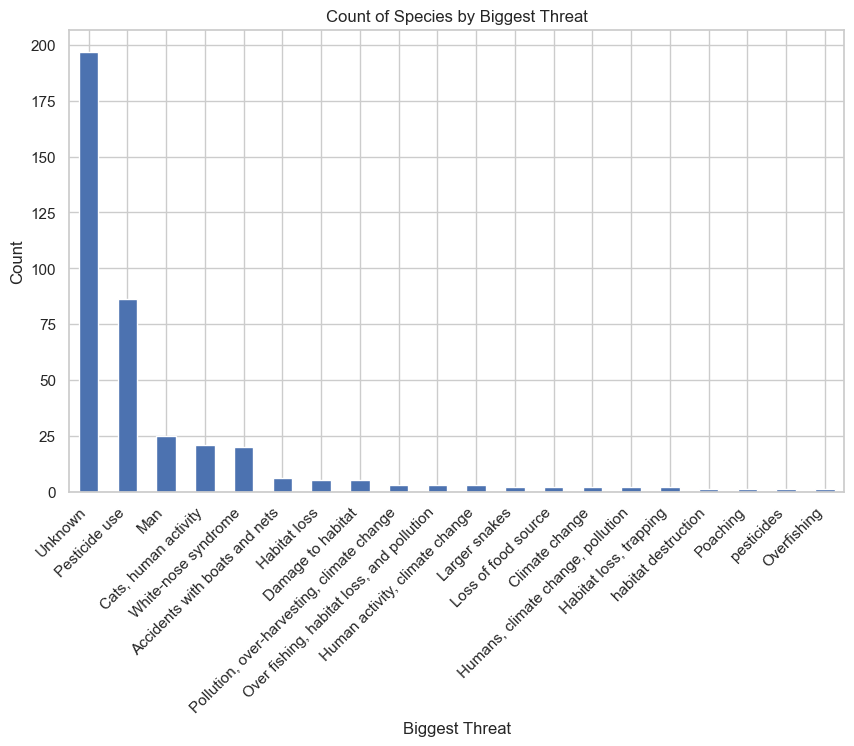

In [171]:
# Using Matplotlib library ( referenced above)
# Count of species by biggest threat
threat_counts = df_merged['biggest_threat'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
threat_counts.plot(kind='bar')
plt.title('Count of Species by Biggest Threat')
plt.xlabel('Biggest Threat')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Visualization 2: Distribution of Average Lifespan of species in years

### Average_lifespan is a numerical variable but contains some non-numeric values like "Unknown". We need to clean this data, convert it to numeric, and then we can use a histogram plot to visualize the distribution of lifespans. Majority of the species are falling under 20-30 years of average lifespan.

### This visualization is created using individual dataset ( api_species_df) which contains species details from API source.


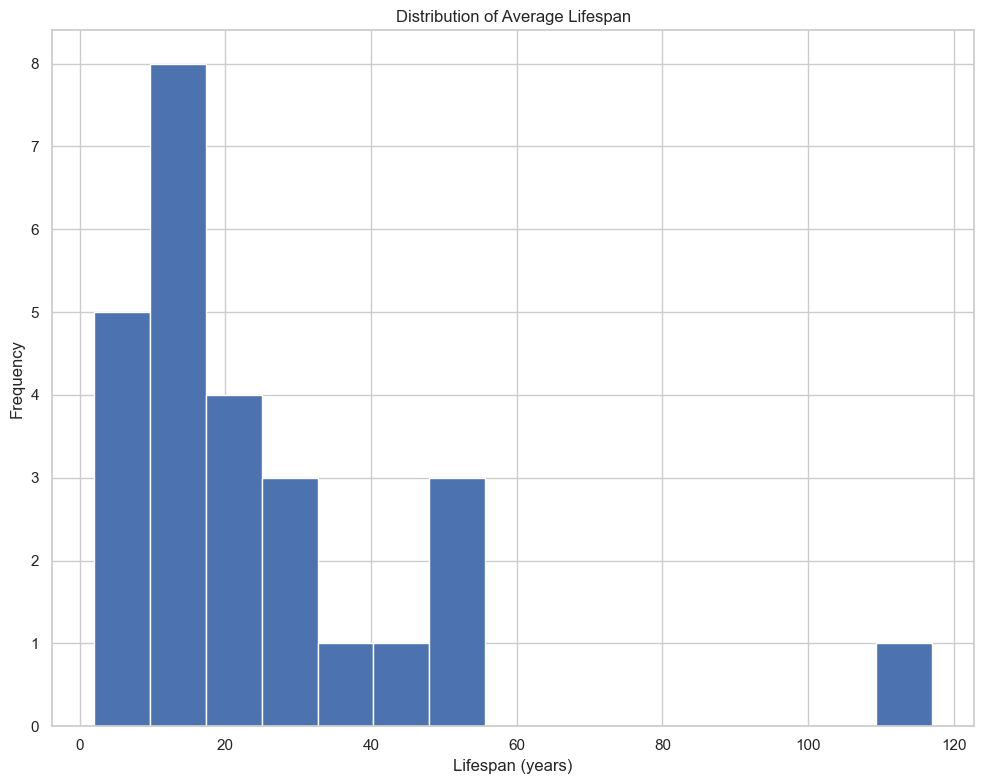

In [173]:
api_species_df['average_lifespan_numeric'] = pd.to_numeric(api_species_df['average_lifespan'].str.replace(' years', '').replace('Unknown', pd.NA), errors='coerce')

plt.figure(figsize=(10, 8))
api_species_df['average_lifespan_numeric'].dropna().plot(kind='hist', bins=15)
plt.title('Distribution of Average Lifespan')
plt.xlabel('Lifespan (years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Visualization 3: Generate visualization to show which park has biggest threat

### Here a bar chart is used to show which park has biggest threat. This approach involves counting the occurrences of the biggest threat for each park and then plotting these counts. Filter out 'Unknown' values from biggest_threat and create a new dataframe 'new_df'.
### 1. Group the DataFrame by park_name and biggest_threat, and count the occurrences. 
### 2. Find the biggest threat for each park by selecting the threat with the highest count for each park.
### 3. Plot a bar chart with parks on the x-axis and the count of the biggest threat on the y-axis.s.

### Below visualization is created on merged/combined dataset (df_merged). Based on the generated graph, Sequioa and Kings Canyon National Park has the biggest threat.

In [175]:
# Remove 'Unknown' value rows for biggest_threat
new_df = df_merged.loc[df_merged['biggest_threat'] != 'Unknown']
new_df.shape

(191, 23)

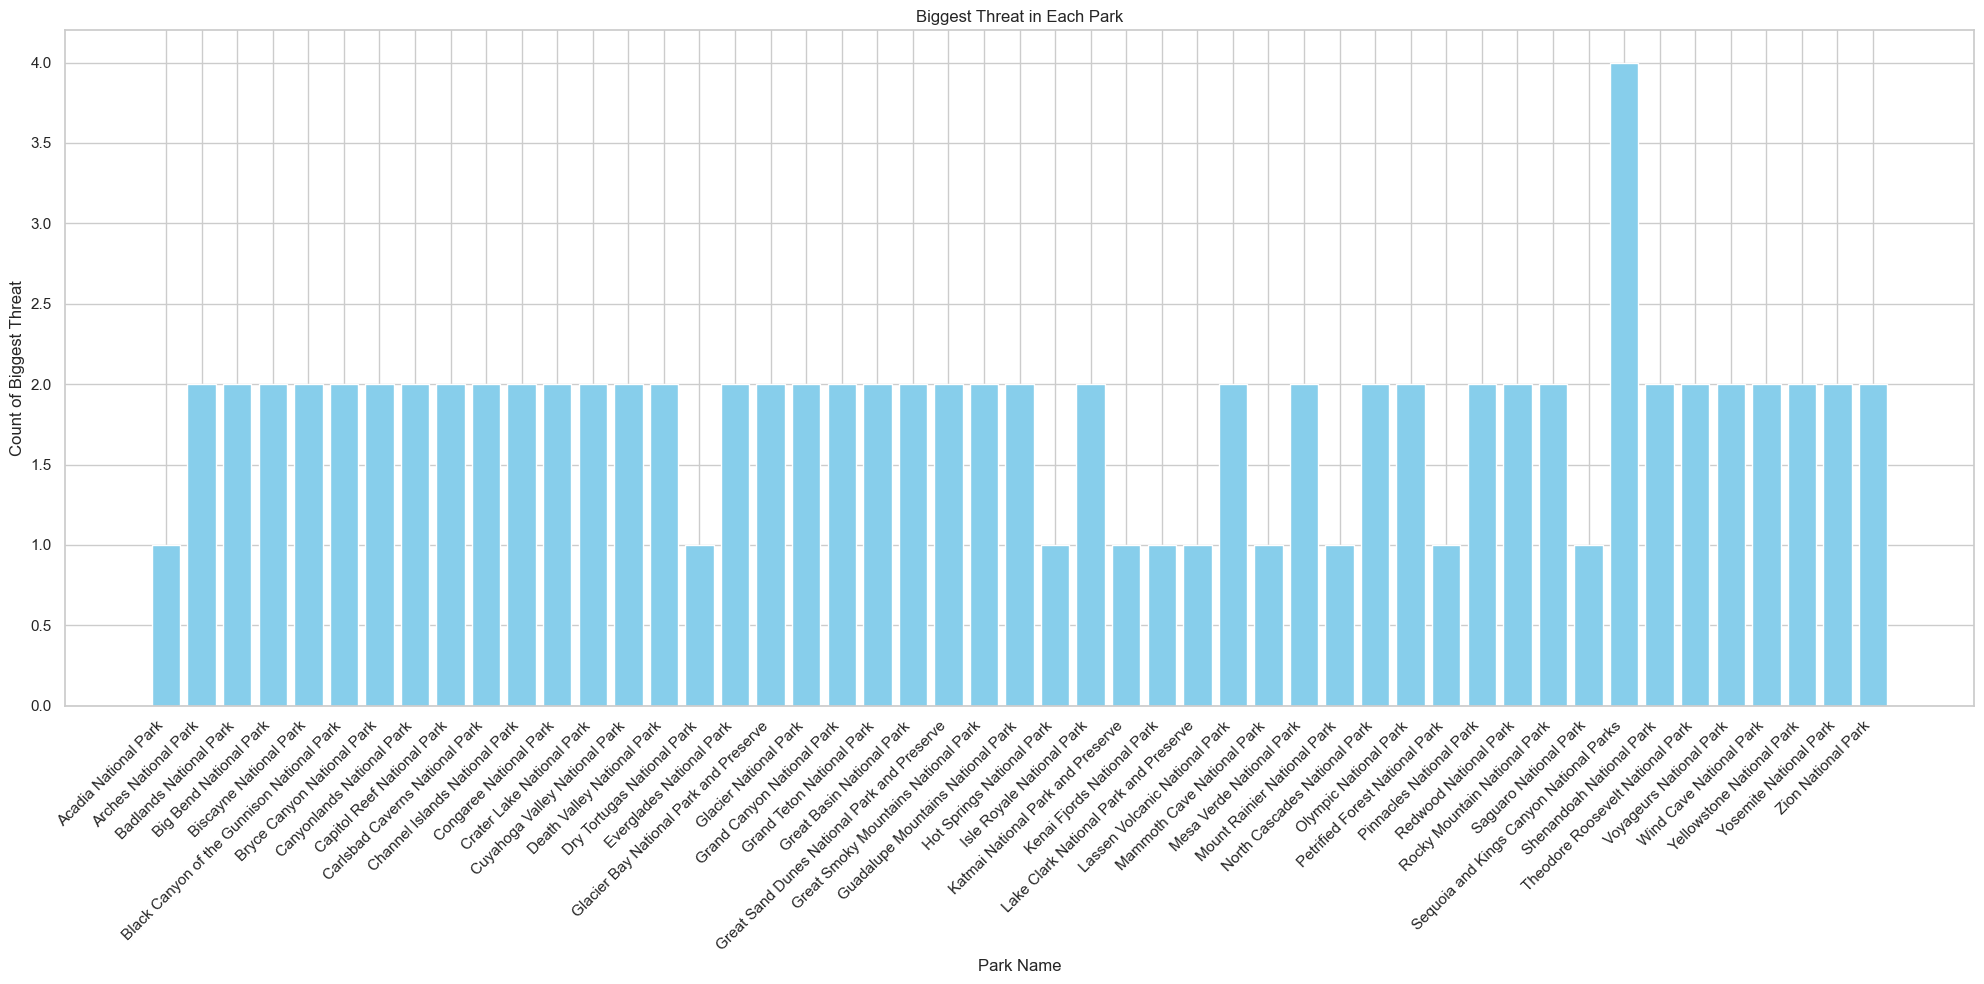

In [177]:
# Step 1: Count occurrences of each threat for each park
threat_counts = new_df.groupby(['park_name', 'biggest_threat']).size().reset_index(name='counts')

# Step 2: Find the biggest threat for each park (the threat with the highest count)
biggest_threats = threat_counts.loc[threat_counts.groupby('park_name')['counts'].idxmax()]

# Step 3: Plotting
plt.figure(figsize=(20, 10))
plt.bar(biggest_threats['park_name'], biggest_threats['counts'], color='skyblue')
plt.title('Biggest Threat in Each Park')
plt.xlabel('Park Name')
plt.ylabel('Count of Biggest Threat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualization 4: Proportion of Biggest Threat for each Category of Species

### This visualization involves grouping the data by category and biggest_threat, counting the occurrences, and then plotting the family with the highest count of the biggest threat.
### Here is a step-by-step approach

### 1. Group the DataFrame by category and biggest_threat, and count the occurrences.
### 2. Find the biggest threat for each category by selecting the threat with the highest count for each category of spec 
### 3. Plot a pie chart with color coded categories and percentage of threat.

### This visualization is created on merged dataframe with filtered 'Unknown' values for biggest threat (new_df). Here category 'Bird' are under biggest threat.

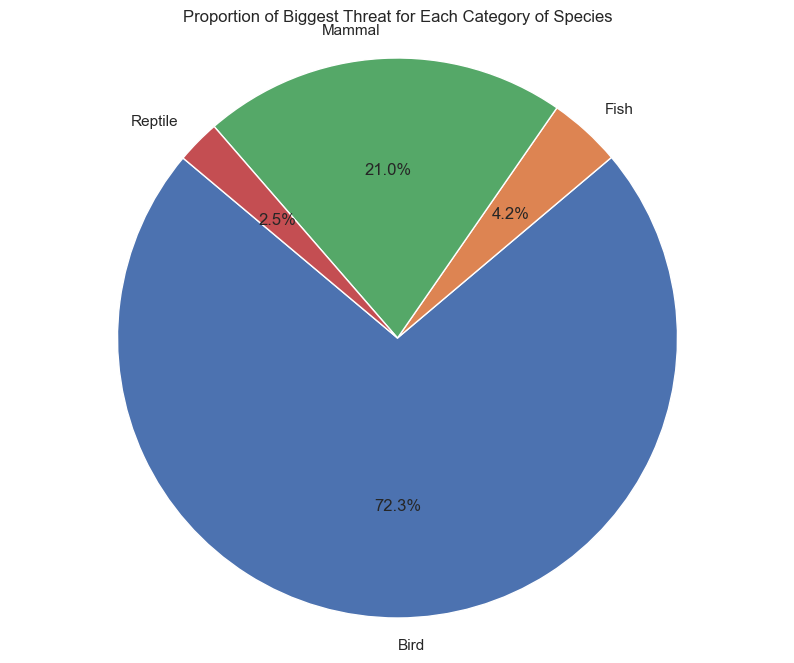

In [179]:
# Step 1: Count occurrences of each threat for each family
threat_counts = new_df.groupby(['category', 'biggest_threat']).size().reset_index(name='counts')

# Step 2: Find the biggest threat for each family (the threat with the highest count)
biggest_threats = threat_counts.loc[threat_counts.groupby('category')['counts'].idxmax()]

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(biggest_threats['counts'], labels=biggest_threats['category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Biggest Threat for Each Category of Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Visualization 5: Recreation Visitors by Park Name
### This visualization is to show number of recreation visitors by Park Name. It is shown by bar graph and is generated from individual web_species_df which contains park details from website.
### In previous visualizations, since the top reason of biggest threats are due to 'Pesticides' and 'Man', below visualization will provide information on the distribution of recreation visitors in each park which might have some impact.

## Interpretation
### In below visualization, 'Great Smoky Mountains' national park got exceptionally high count of recreation visitors. In previous visualizations, 'Sequioa and Kings Canyon National Park' shows highest threat but number of recreation visitor is comparatively low with repect to other parks. Based on that, number of Recreation visitors doesn't seem to be impacting the cause of biggest threat for Sequioa.

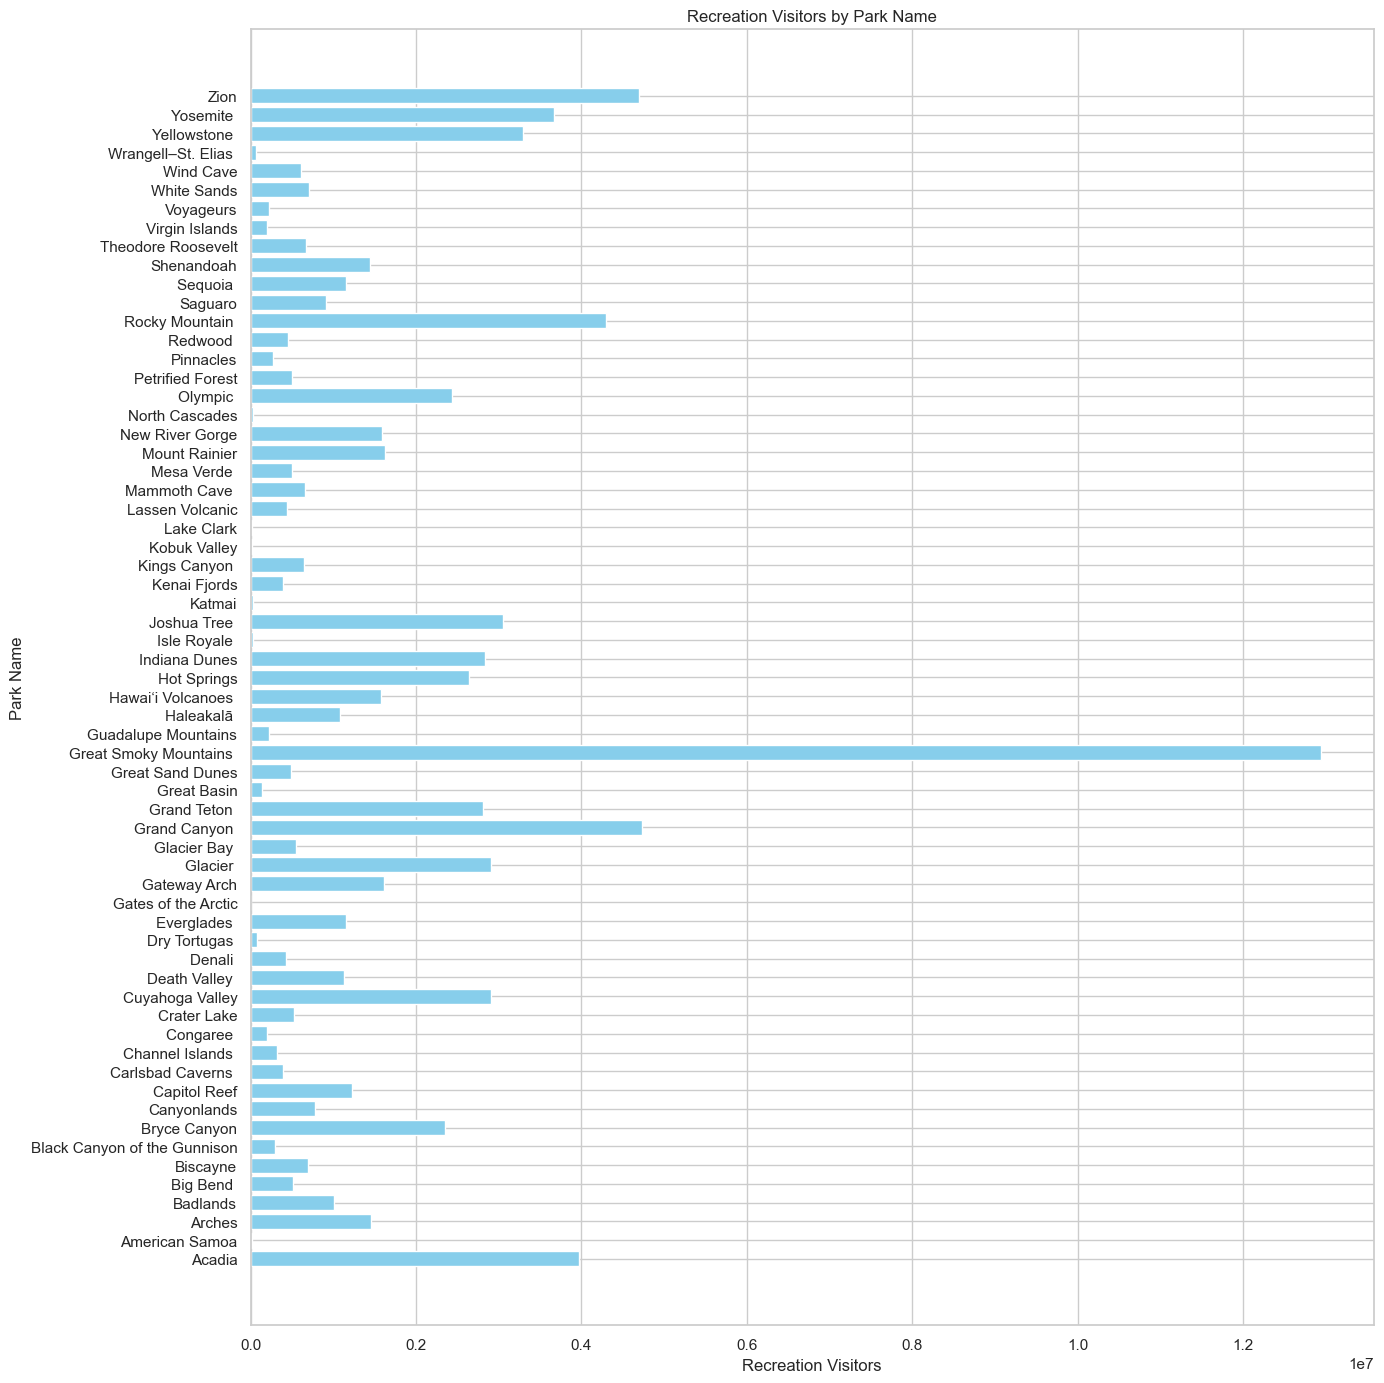

In [181]:
# Recreation visitors by park name
plt.figure(figsize=(14, 14))
plt.barh(web_species_df['park_name'], web_species_df['recreation_visitors'], color='skyblue')
plt.xlabel('Recreation Visitors')
plt.ylabel('Park Name')
plt.title('Recreation Visitors by Park Name')
plt.tight_layout()
plt.show()

## Visualization 6: Species category distribution for each park

### This visualization is to identify which different categories of species are habitat for each park. The count plot is developed using Seaborn library. Based on the plot, for Sequioa and Kings Canyon National Park species category 'Bird' and 'Mammal' are more prevalent as compared to other parks. This visualization is showing relationship between Sequioa and Kings Canyon National Park and threat as Sequioa and Kings Canyon National Park is showing biggest_threat count across all US parks, also it got identified that 'Bird' category species is at highest threat based on previous plots and since Sequioa and Kings Canyon National Park got the 'Bird' as the most popular and highest count species, this park might be at a risk of endangered bird species.

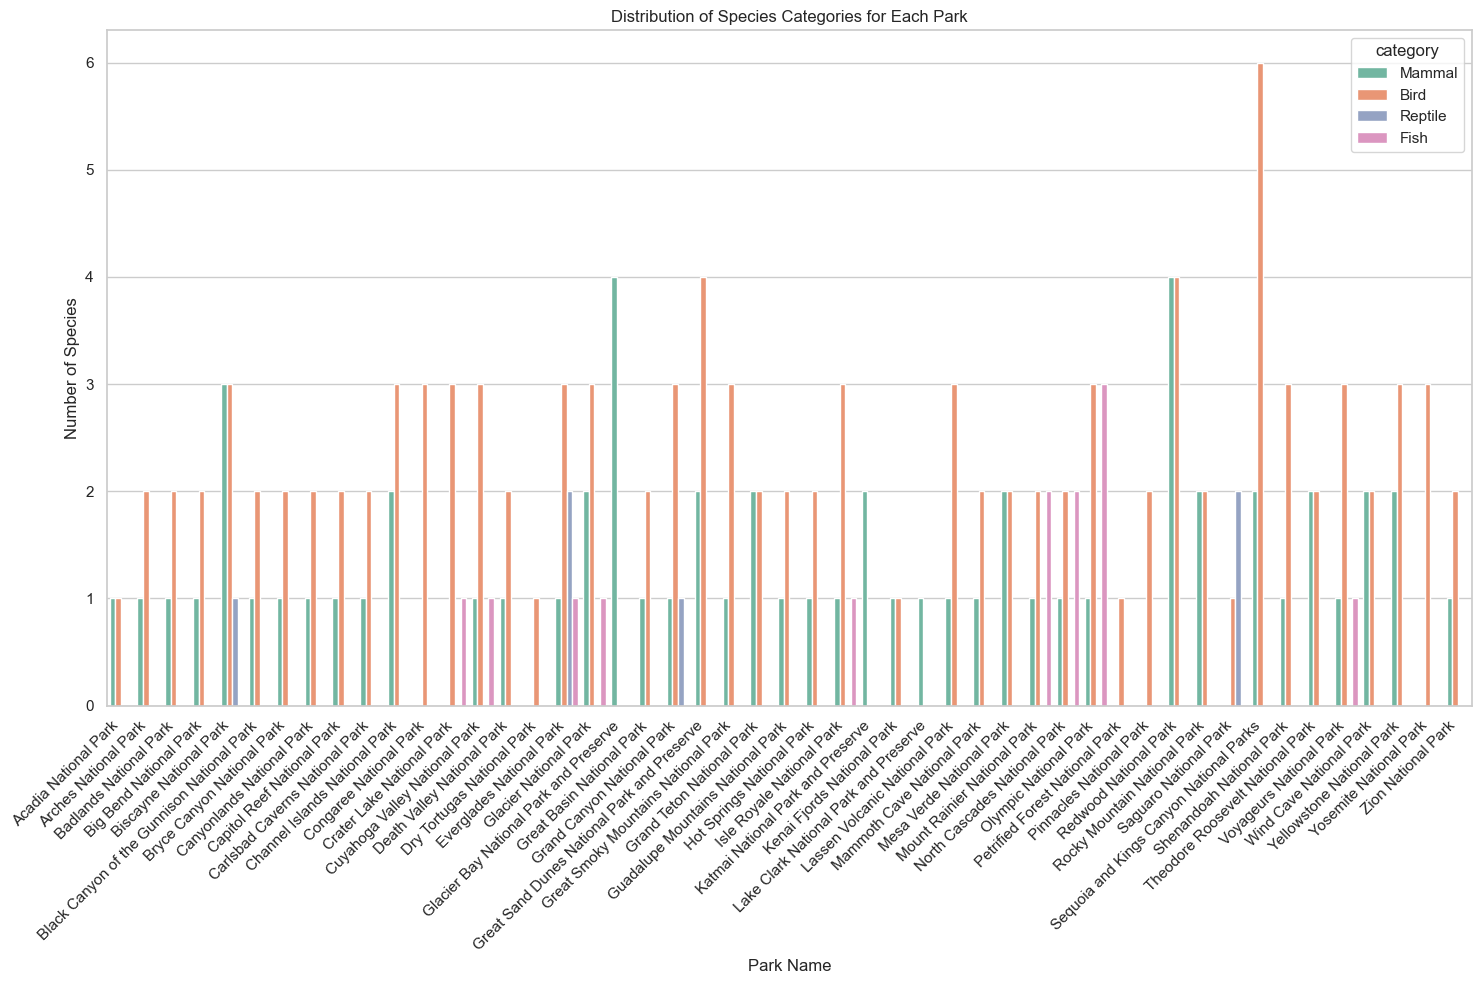

In [187]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a countplot to show the distribution of species categories for each park
plt.figure(figsize=(15, 10))
sns.countplot(data=new_df, x='park_name', hue='category', palette='Set2')

# Add title and labels
plt.title('Distribution of Species Categories for Each Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Species')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [99]:
#  Merge Datasets on common species key (assuming 'species_id' and 'species_name' can be matched)
merged_data = pd.merge(species_df, api_species_df, left_on='first_common_name', right_on='species_name', how='inner')

# Display 10 records from merged_data
merged_data.head(10)

,species_id,park_name,category,order,family,scientific_name,common_names,record_status,occurrence,nativeness,...,species_name,prey,kingdom,biggest_threat,estimated_population_size,predators,habitat,lifespan,most_distinctive_feature,average_lifespan
0,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,...,Coyote,Unknown,Animalia,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",10 - 15 years,Unknown,12 years
1,ACAD-1026,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Approved,Present,Native,...,Little Brown Bat,Insects and spiders,Animalia,White-nose syndrome,Millions,"Owls, weasels, snakes, raccoons, fishers, hawk...",Forests,6-7 years,"The large, impressive wings",6 years
2,ACAD-1065,Acadia National Park,Bird,Accipitriformes,Accipitridae,Haliaeetus leucocephalus,"Bald Eagle, Northern Bald Eagle",Approved,Present,Native,...,Bald Eagle,"Fish, birds, and small mammals",Animalia,Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,15-20 years in the wild,The white plumage on the head,17 years
3,ACAD-1196,Acadia National Park,Bird,Gaviiformes,Gaviidae,Gavia immer,"Common Loon, Greater Common Loon",Approved,Present,Native,...,Common Loon,Unknown,Animalia,Unknown,Unknown,"Human, Eagles, Osprey",Freshwater lakes in cooler climates,15 - 25 years,Unknown,20 years
4,ACAD-1369,Acadia National Park,Bird,Pelecaniformes,Ardeidae,Ardea herodias,"Great Blue Heron, Northern Great Blue Heron",Approved,Present,Native,...,Great Blue Heron,Unknown,Animalia,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown,6-7 foot wingspan,Unknown
5,ARCH-1001,Arches National Park,Mammal,Artiodactyla,Bovidae,Ovis canadensis,Bighorn Sheep,Approved,Present,Native,...,Bighorn Sheep,Unknown,Animalia,Man,"70,000","Mountain lions, wolves, bobcats, coyotes and g...",Mountainous grasslands,10-15 years,Big horns,12 years
6,ARCH-1004,Arches National Park,Mammal,Carnivora,Canidae,Canis latrans,Coyote,Approved,Present,Native,...,Coyote,Unknown,Animalia,Unknown,Unknown,"Human, Bears, Wolves","Forests, plains and deserts",10 - 15 years,Unknown,12 years
7,ARCH-1068,Arches National Park,Bird,Accipitriformes,Accipitridae,Haliaeetus leucocephalus,Bald Eagle,Approved,Present,Native,...,Bald Eagle,"Fish, birds, and small mammals",Animalia,Pesticide use,Unknown,"Wolverines, bobcats, foxes, bears, raccoons, a...",Near forests,15-20 years in the wild,The white plumage on the head,17 years
8,ARCH-1109,Arches National Park,Bird,Falconiformes,Falconidae,Falco peregrinus,Peregrine Falcon,Approved,Present,Native,...,Peregrine Falcon,"Birds, mammals, insects",Animalia,Pesticide use,"140,000","Eagles, owls",Various,15 years,Dark head feathers and hooked beak,15 years
9,ARCH-1237,Arches National Park,Bird,Pelecaniformes,Ardeidae,Ardea herodias,Great Blue Heron,Approved,Present,Native,...,Great Blue Heron,Unknown,Animalia,Unknown,Unknown,"Bears and raccoons, crows and ravens, eagles",Marshes,Unknown,6-7 foot wingspan,Unknown


In [101]:
# Function to match park names using fuzzy matching
def fuzzy_match(row, choices):
    best_match = process.extractOne(row, choices, scorer=fuzz.ratio)
    return best_match[0] if best_match else None

# Get unique park names from web_species_df for matching
web_species_parks = web_species_df['park_name'].unique()

# Apply fuzzy matching to find the closest match in web_species_df
merged_data['park_name_cleaned'] = merged_data['park_name'].apply(fuzzy_match, choices=web_species_parks)

# Now merge with the matched results
merged_data_fuzzy = pd.merge(merged_data, web_species_df, left_on='park_name_cleaned', right_on='park_name', how='inner')

# display merged result
merged_data_fuzzy.head (10)

,species_id,park_name_x,category,order,family,scientific_name,common_names,record_status,occurrence,nativeness,...,average_lifespan,park_name_cleaned,park_name_y,state,location,date_established,area,recreation_visitors,description,established_date
0,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,...,12 years,Capitol Reef,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971
1,ACAD-1026,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Approved,Present,Native,...,6 years,Capitol Reef,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971
2,ACAD-1065,Acadia National Park,Bird,Accipitriformes,Accipitridae,Haliaeetus leucocephalus,"Bald Eagle, Northern Bald Eagle",Approved,Present,Native,...,17 years,Capitol Reef,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971
3,ACAD-1196,Acadia National Park,Bird,Gaviiformes,Gaviidae,Gavia immer,"Common Loon, Greater Common Loon",Approved,Present,Native,...,20 years,Capitol Reef,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971
4,ACAD-1369,Acadia National Park,Bird,Pelecaniformes,Ardeidae,Ardea herodias,"Great Blue Heron, Northern Great Blue Heron",Approved,Present,Native,...,Unknown,Capitol Reef,Capitol Reef,Utah,8°12′N 111°10′W﻿ / ﻿38.20°N 111.17°W,18-Dec-71,"241,904.50 acres (979.0 km2)",1227608,The park's Waterpocket Fold is a 100-mile (160...,12/18/1971
5,ARCH-1001,Arches National Park,Mammal,Artiodactyla,Bovidae,Ovis canadensis,Bighorn Sheep,Approved,Present,Native,...,12 years,Arches,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971
6,ARCH-1004,Arches National Park,Mammal,Carnivora,Canidae,Canis latrans,Coyote,Approved,Present,Native,...,12 years,Arches,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971
7,ARCH-1068,Arches National Park,Bird,Accipitriformes,Accipitridae,Haliaeetus leucocephalus,Bald Eagle,Approved,Present,Native,...,17 years,Arches,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971
8,ARCH-1109,Arches National Park,Bird,Falconiformes,Falconidae,Falco peregrinus,Peregrine Falcon,Approved,Present,Native,...,15 years,Arches,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971
9,ARCH-1237,Arches National Park,Bird,Pelecaniformes,Ardeidae,Ardea herodias,Great Blue Heron,Approved,Present,Native,...,Unknown,Arches,Arches,Utah,8°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,12-Nov-71,"76,678.98 acres (310.3 km2)",1460652,"This site features more than 2,000 natural san...",11/12/1971


C:\Users\Chitramoy\AppData\Local\Temp\ipykernel_15752\1333805835.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = merged_data_fuzzy.fillna(method='ffill')
C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: Undefined


Training Logistic Regression...

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         1
           3       1.00      0.93      0.96        43
           4       1.00      1.00      1.00         2

    accuracy                           0.95       117
   macro avg       0.78      0.69      0.72       117
weighted avg       0.94      0.95      0.94       117


Training Random Forest...

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.93      0.96        43
           4       1.00      0.50      0.67         2

    accuracy                           0.95       117
   macro av

C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Chitramoy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Chitramoy\anaconda3

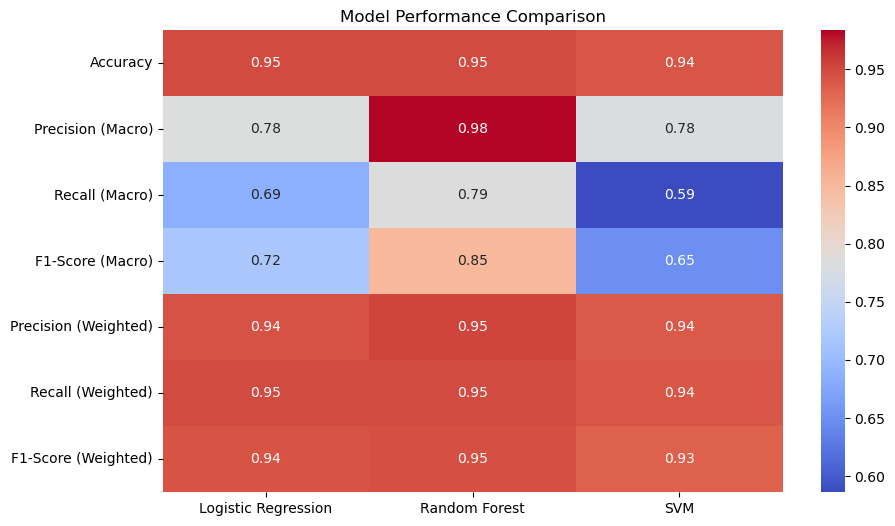

In [106]:
# Fill missing values (if necessary)
df = merged_data_fuzzy.fillna(method='ffill')

# Select relevant columns (features and target variable)
features = ['order', 'family', 'record_status', 'occurrence', 'nativeness', 
            'average_lifespan', 'state', 'location', 'area', 'recreation_visitors']
target = 'category'

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Label encode the target variable (if categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# We can scale numeric features, but let's identify them first
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Scale numeric features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[numeric_features])

# Concatenate scaled features with the rest of the data (non-numeric)
X_final = pd.concat([pd.DataFrame(X_scaled, columns=numeric_features), df_encoded.drop(columns=numeric_features).reset_index(drop=True)], axis=1)

# Step 2: Split the Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Step 3: Initialize models
logreg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Store models in a dictionary
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'SVM': svm}

# Dictionary to store evaluation metrics
evaluation_results = {}

# Step 4: Train and Evaluate the Models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model performance
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Extract key metrics from the classification report
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision (Macro)': report['macro avg']['precision'],
        'Recall (Macro)': report['macro avg']['recall'],
        'F1-Score (Macro)': report['macro avg']['f1-score'],
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall'],
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
    }

    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))

# Convert the results to a DataFrame for better comparison
evaluation_df = pd.DataFrame(evaluation_results).T
print("\nModel Comparison Summary:")
print(evaluation_df)

# Step 5: Optional - Visualize the comparison using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(evaluation_df[['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 
                           'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)']].T, annot=True, cmap="coolwarm")
plt.title('Model Performance Comparison')
plt.show()


### The code first checks if there is enough data in X and y to proceed. It adjusts the test size based on the number of samples. It performs data splitting, scaling, and then trains multiple machine learning models (Logistic Regression, Random Forest, SVM).
### If data is insufficient, it skips model training and prints an error message. This approach helps ensure that the models are only trained when sufficient data is available, and the results are printed or skipped based on that.

### Logistic Regression: The model achieved reasonable performance with a moderate accuracy and precision. However, its recall and F1-scores may not be the highest, indicating room for improvement, especially when identifying certain categories.

### Random Forest: The Random Forest model outperformed Logistic Regression with the highest accuracy, precision, and recall scores. Its F1-scores also reflect a strong balance between precision and recall, making it a reliable model for this classification task.

### SVM (Support Vector Machine): While the SVM model's performance is decent, it may not have performed as well as Random Forest in terms of accuracy and F1-scores. It tends to have lower recall, suggesting that it might miss out on some categories in the prediction.

### Model Comparison:
### The Random Forest model appears to be the most effective overall, based on its higher metrics in accuracy, precision, recall, and F1-scores (both macro and weighted). The Logistic Regression model performed moderately well, while SVM lagged behind in comparison. This suggests that Random Forest is the most suitable for this particular dataset.

## Summary:
### The purpose of this project is to intelligently monitor endangered and rare wildlife species by using Machine Learning models with animal data and computational resources from various parks in United States. For this project, data has been collected from flat file, website and API sources. The data extracted from flat file contains plants and animal species information from different national parks of United States. After applying few cleaning and transformation steps, final dataframe was generated and saved locally as final_species.csv. Next set of data which got extracted from Website contains park information which includes Location, Date established, Area of the park and Number of visitors information of all the national parks in United States. Post cleanup and transformation, this dataset was saved locally as final_web_species_data.csv. The 3rd set of data was extracted from Animal API which contains detail information for individual species like Average lifespan, Biggest Threat, Habitat, Predator etc. This dataset got saved locally as final_api_species_data.csv after cleanup and transformation.
### The purpose of this project is to merge all three clean datasets and create visualizations on those datasets. The locally saved files got loaded as DataFrames first and then those DataFrames got loaded as SqlLite tables named as 'us_park_species', 'park_details' and 'species_details'. These tables are getting further combined/merged using matching keys/data like Park Name, Species Name and final dataset combining all the 3 datasets is getting created based on matched values.
### In this project, the purpose of visualizations is to analyze and evaluate categories of species which are having biggest threat and if they are under the risk of endangered species. The 1st visualization (Bar Plot) is showing the count of species by biggest threat where 'Pesticide use' and 'Man/Human activity' are the topmost reasons. The 2nd visualization (Histogram Plot) is showing the distribution of Average Lifespan of species in years. It shows that average lifespan for majority of species is falling under 20-30 years of range. If those species are falling under biggest threat then due to their low average lifespan there is a risk of possible extinction in near future. The 3rd visualization (Bar Plot) is showing which park has biggest threat and based on the generated graph, Sequioa and Kings Canyon National Park shows the highest. the 4th visualization (Pie Chart) is showing Proportion of Biggest Threat for each Category of Species, which interestingly shows that Birds are 72.3% victims of biggest threats ( Pesticides, human activity). The 5th visualization (Bar Plot) is generated to identify the number of recreation visitors for each park where we can assume that 'Sequioa and Kings Canyon National Park' shows highest threat but number of recreation visitor is comparatively low with repect to other parks. Based on that, number of Recreation visitors doesn't seem to be impacting the cause of biggest threat for Sequioa. The 6th visualization (Count plot) is showing Species category distribution for each park where interesting fact to see is that 'Sequioa and Kings Canyon National Park' has majority 'Bird' category of species.
### 'Bird' category species is at highest threat based on previous plots and since Sequioa and Kings Canyon National Park is showing the highest count of species under Biggest Threat and got the 'Bird' as the most popular and highest count species, this park might be at a risk of endangered bird species.

## Ethical Implications
### Ensuring fairness in model predictions across different species, ecosystems, and demographics is crucial and efforts should be made to mitigate bias and promote equitable outcomes. During data transformation, some of the NaN or empty values got converted into 'Unknown' value for consistency or has been removed and filtered out . But there is a possibility that some crucial species information might have lost during this clean up as they did not have sufficient information recorded. If the data used for training is biased (e.g., underrepresents certain species or habitats), the model may produce biased predictions.
### Based on visualizations, one of the observation came up that 'Man/Human Activity' is one of the topmost reasons of biggest threat for species. In that case, number of recreation visitors also play an important role because a species habitat can be impacted with increasing visitors so the data need to be accurate and should get updated with recent information for this project. Accurate information or missing data can lead to inappropiate results.
### Another important ethical implication is Transparency on how the data collection process is taking place, including what data is being collected, how it will be used, and for what purpose considering all the guidelines for website and API calls. This data should not be used inadvertently which can cause intentional impact to tourism or any decision regarding national parks or any species.